In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa.display
import librosa
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [5]:
path=[]
label=[]
for dirname,_,filenames in os.walk('/content/drive/Shareddrives/Proyek 2024/Data_Customer2/'):
    for filename in filenames:
        path.append(os.path.join(dirname,filename))
        lab=filename.split('_')[-1].split('.')[0]
        label.append(lab.lower())
print('Dataset loaded')

Dataset loaded


In [6]:
print(path[:5])

['/content/drive/Shareddrives/Proyek 2024/Data_Customer2/Baik Sekali/20231228145350-4109-6a5581327d_BaikSekali.wav', '/content/drive/Shareddrives/Proyek 2024/Data_Customer2/Baik Sekali/20231227085123-4350-f821cf3ee7_BaikSekali.wav', '/content/drive/Shareddrives/Proyek 2024/Data_Customer2/Baik Sekali/20231227085632-4409-fcda9511bd_BaikSekali.wav', '/content/drive/Shareddrives/Proyek 2024/Data_Customer2/Baik Sekali/20231227080333-4256-cc574e605a_BaikSekali.wav', '/content/drive/Shareddrives/Proyek 2024/Data_Customer2/Baik Sekali/20231227082557-4409-e0db3e74e6_BaikSekali.wav']


In [7]:
print(label[:5])

['baiksekali', 'baiksekali', 'baiksekali', 'baiksekali', 'baiksekali']


In [8]:
df=pd.DataFrame({'speech':path,'label':label})
df.head()

speech       label
0  /content/drive/Shareddrives/Proyek 2024/Data_C...  baiksekali
1  /content/drive/Shareddrives/Proyek 2024/Data_C...  baiksekali
2  /content/drive/Shareddrives/Proyek 2024/Data_C...  baiksekali
3  /content/drive/Shareddrives/Proyek 2024/Data_C...  baiksekali
4  /content/drive/Shareddrives/Proyek 2024/Data_C...  baiksekali

In [9]:
df['label'].value_counts()

baiksekali    130
netral        100
buruk          36
Name: label, dtype: int64

In [10]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc
extract_mfcc(df['speech'][0])

array([-7.6085046e+02,  5.8624161e+01, -2.5589830e+01,  7.9830022e+00,
        1.0271939e+01, -1.2885241e+01,  4.1081958e+00,  9.7123522e-01,
       -9.0456171e+00,  4.0213804e+00, -1.0092577e+00, -5.5962710e+00,
        4.3287792e+00, -1.5190758e+00, -3.3580613e+00,  3.5293615e+00,
       -2.1226120e+00, -1.7340624e+00,  2.3779578e+00, -3.1957266e+00,
       -9.7352475e-01,  2.4764478e+00, -1.2574714e+00,  1.1984823e+00,
        1.5098010e+00, -1.7207552e+00,  1.5007938e+00,  4.8244026e-01,
       -2.0076096e+00,  1.3282287e+00, -1.8406393e-01, -1.2754422e+00,
        1.9362487e+00,  7.4138172e-02,  1.4160143e-01,  2.2206113e+00,
       -1.3952023e+00, -1.2786629e+00,  1.2692275e+00, -7.5822711e-01],
      dtype=float32)

In [11]:
X_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))
X_mfcc

0      [-760.85046, 58.62416, -25.58983, 7.983002, 10...
1      [-732.1029, 84.06212, -36.77037, 6.489143, 11....
2      [-493.6283, 116.028435, -28.010809, 17.21606, ...
3      [-479.22784, 145.08997, -54.0639, 0.69548583, ...
4      [-515.00946, 114.85032, -28.212791, 12.611957,...
                             ...                        
261    [-483.71695, 161.90427, -69.72056, 1.6129644, ...
262    [-400.20844, 178.90837, -33.754307, 22.637222,...
263    [-460.70734, 177.92139, -81.63541, -3.0529466,...
264    [-486.31696, 169.43422, -76.066795, 0.23152786...
265    [-425.04077, 178.79973, -63.08919, 11.868519, ...
Name: speech, Length: 266, dtype: object

In [12]:
X=np.array(X_mfcc.tolist())
X.shape

(266, 40)

In [13]:
X=np.expand_dims(X,-1)
X.shape

(266, 40, 1)

In [14]:
from keras.utils import to_categorical
Y=to_categorical(df['label'].map({'baiksekali':0,'netral':1,'buruk':2}))
Y.shape

(266, 3)

In [15]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [19]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model=Sequential([
    LSTM(512,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(3,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 512)               1052672   
                                                                 
 dense_3 (Dense)             (None, 64)                32832     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1087683 (4.15 MB)
Trainable params: 1087

In [21]:
history=model.fit(X,Y,epochs=100,batch_size=512,validation_split=0.2,shuffle=True)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.1132 - accuracy: 0.1368 - val_loss: 1.0615 - val_accuracy: 0.9259
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.0932 - accuracy: 0.4811 - val_loss: 1.0053 - val_accuracy: 0.9259
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.0756 - accuracy: 0.5755 - val_loss: 0.9897 - val_accuracy: 0.8704
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 1.0550 - accuracy: 0.6604 - val_loss: 0.9723 - val_accuracy: 0.8519
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 1.0280 - accuracy: 0.7075 - val_loss: 0.9429 - val_accuracy: 0.7778
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.9852 - accuracy: 0.7311 - val_loss: 1.0962 - val_accuracy: 0.3889
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 0.8928 - accuracy: 0.6887 - val_loss: 0.5749 - val_accuracy: 0.9074
Epoch 8/100
1/1 [=================

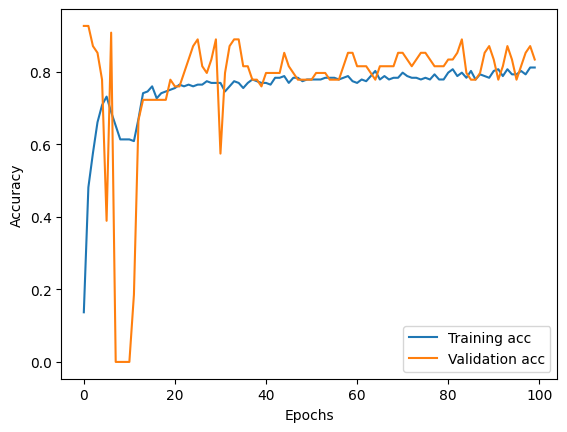

In [22]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

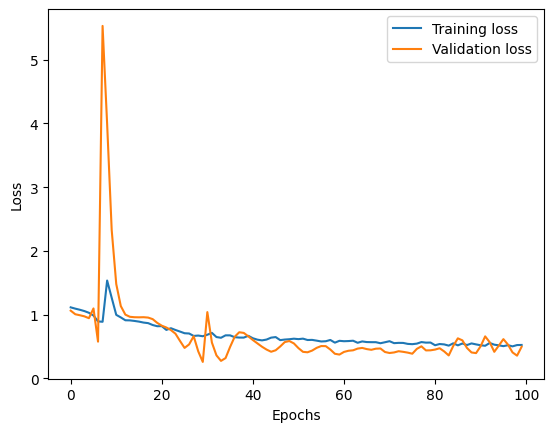

In [23]:
epochs=list(range(100))
loss=history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
model.save('/content/drive/Shareddrives/Proyek 2024/model.h5')

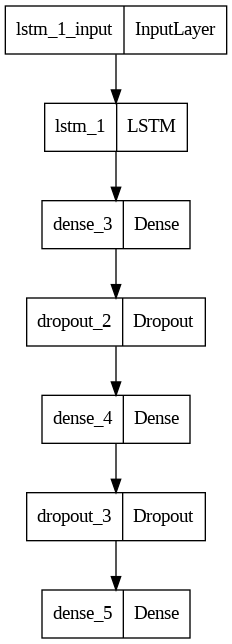

In [25]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
)